In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# koristicemo neki  ugradjen dataset iz sklearn
data = datasets.load_breast_cancer()

In [3]:
print(data.feature_names)
print(len(data.feature_names))
print(data.data)
print(data.data.shape)
print(data.target)         # ono sto treba da se dobije klasifikacijom
print(data.target.shape)   # ima isti shape kao i podacie

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
30
[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
(569, 30)
[0 0 0 0 0 0 0 0 0 0 0 0

In [4]:
X = data.data
y = data.target

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

(398, 30)
(171, 30)
[1.299e+01 1.423e+01 8.408e+01 5.143e+02 9.462e-02 9.965e-02 3.738e-02
 2.098e-02 1.652e-01 7.238e-02 1.814e-01 6.412e-01 9.219e-01 1.441e+01
 5.231e-03 2.305e-02 3.113e-02 7.315e-03 1.639e-02 5.701e-03 1.372e+01
 1.691e+01 8.738e+01 5.760e+02 1.142e-01 1.975e-01 1.450e-01 5.850e-02
 2.432e-01 1.009e-01]


In [6]:
# standardizaciju radimo jer podaci mozda nisu na istoj skali
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print(X_train[0])

# obavezno kada skaliramo test podatke treba da koristimo siti scaler kao za train, podseti se sa IP
X_test = scaler.transform(X_test)

[-0.32429881 -1.15003767 -0.32535806 -0.39922626 -0.11821685 -0.07701115
 -0.65482488 -0.73036996 -0.56187199  1.2723845  -0.77917122 -1.031772
 -0.92191029 -0.53533519 -0.61481545 -0.13138235 -0.03907495 -0.74175781
 -0.51696191  0.64582948 -0.5278475  -1.41291056 -0.59099941 -0.53390993
 -0.79622477 -0.36263373 -0.62895927 -0.86662682 -0.76393673  0.89012251]


In [7]:
# odavde nadalje radimo neurosnke mreze
# od neke (nzm koje) verzije tensorflowa, keras je ukljucen u njega
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# pravimo sekvencijalni model
model = Sequential()
# i dodajemo mu slojeve, Dense je gusti sloj, tj potpuno povezan sloj
# ulaz u sloj treba da bude jedna isntanca iz trening skuopa, tj ta dimnzija
# broj neurona u sloju se zadaje sa units, treba da zadamo i aktivacionu funkciju na svakom sloju
# takodje primetimo dna grafiku za relu da ona nije diferencijabilna, ali smo u jednoj tacki
# tj ne moze bas stvarno da se za nju u svakoj tacki nadje gradijent. Verovatnoca da se bas ubode ta tacka je veoma mala
# a cak i da se ubode nije strano jer ce samo u jednom koraku da se izracuna 'pogresno'
# ova se cesto koristi zato sto je vrlo jednostavna
model.add(Dense(input_dim=X_train.shape[1], units=100, activation='relu'))
# input dim mora da se zada samo na prvom sloju, jer je ulaz u drugi izlaz iz prvog i model moze
# sam da zakljuci koliko je to
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))   # sigmoid koristimo zambianrnu klasifikaciju

# opise nam kako izgleda nas model+
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               3100      
                                                                 
 dense_1 (Dense)             (None, 40)                4040      
                                                                 
 dense_2 (Dense)             (None, 1)                 41        
                                                                 
Total params: 7,181
Trainable params: 7,181
Non-trainable params: 0
_________________________________________________________________


In [8]:
# optimizer mozemo da uzmemo adam, to je onaj alg iz gradijetnog spusta koji smo pominjali na nekim vezbama pre
# loss je funkcija greske koju krositimo, posto krositimo za binarnu klasifikaciju,
# mozemo da krositimo bianrnu krosentropiju, vidi formulu na netu
# mtrics je lista metrika koje hocemo da pratimo, npr tacnost
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [9]:
# pokretanje modela
# batch size nam kaze koliko isntanci treba da prodje kroz mrezu pre nego sto se uradi backpropagation i 
# poprave se tezine (?). Ovo nije dobro da bude =1 za slucaj da je ta jedna isntanca outlier i mozda se ne izracuna
# lepo gradijent itd. Nije ni dobro da bude prevelik zato sto bi onda treniranje trajalo previse (?)
# ovo verbose=1 kaze da se ispisuje progress dok alg radi (?)

# stohasticki gradijentni spust - nesto sto nije pravi gradiejnt ali lici na njega, npr to je neka slucajna promenljiva
# koja ima isto ocekivanje kao pravi gradijent, tj u proseku se ponasaju isto (?)
# stohastickom gradijentu treba manje vremena da se izracuna sto mu je prednost

# mini batch - neki kompromis izmedju pravog i stohastickog gradijenta
# to je ovo sto mi koristimo ovde, jer smo stavili size-64 (?)

# broj epoha nam kaze koliko puta se prolazi kroz ceo skup podataka (to je jedna epoha)
history = model.fit(X_train, y_train, batch_size=64, epochs=20, verbose=1, validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 27ms/step - loss: 0.6698 - accuracy: 0.5629 - val_loss: 0.5964 - val_accuracy: 0.7250
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 0.5330 - accuracy: 0.8302 - val_loss: 0.4733 - val_accuracy: 0.8875
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 0.4327 - accuracy: 0.8899 - val_loss: 0.3699 - val_accuracy: 0.9500
Epoch 4/20
5/5 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.9245 - val_loss: 0.2805 - val_accuracy: 0.9625
Epoch 5/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2781 - accuracy: 0.9277 - val_loss: 0.2098 - val_accuracy: 0.9625
Epoch 6/20
5/5 [==============================] - 0s 4ms/step - loss: 0.2256 - accuracy: 0.9371 - val_loss: 0.1587 - val_accuracy: 0.9625
Epoch 7/20
5/5 [==============================] - 0s 5ms/step - loss: 0.1873 - accuracy: 0.9403 - val_loss: 0.1239 - val_accuracy: 0.9625
Epoch 8/20
5/5 [=================

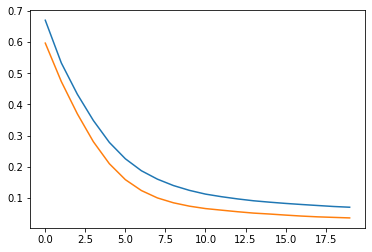

In [10]:
# history objekat koji vrati fit ima razne podatke u sebi, moze da se npr koristi za plotovanje
# kako se tokom epoha ponasao loss

from matplotlib import pyplot as plt

epochs = history.epoch
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])   # val_los je loss na validacionom skupu, slicno dole za accuracy

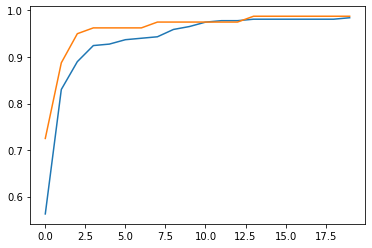

In [11]:
plt.plot(epochs, history.history['accuracy'])
plt.plot(epochs, history.history['val_accuracy'])

In [12]:
# sada ocenjujemo kako se ponasa na test skupu
model.evaluate(X_test, y_test, batch_size=64)

3/3 [==============================] - 0s 1000us/step - loss: 0.0843 - accuracy: 0.9825


[0.0843418538570404, 0.9824561476707458]

In [13]:
# recimo da hocemo da raimo regresiju sa neuronskom mrezom
from keras.datasets import boston_housing

In [14]:
(X_train, y_train), (X_test, y_tet) = boston_housing.load_data()

In [15]:
print(X_train.shape)
print(y_test.shape)
print(y_test)
print(X_train[0])

(404, 13)
(171,)
[1 1 1 1 0 0 0 1 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 1 1
 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 1
 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 0
 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 0]
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


In [16]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[0])

[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]


In [17]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=100, activation='relu'))
# ako ne stavimo aktivacionu funkciju, to samo znaci da ce se bas vratiti izlaz iz sloja
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               1400      
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,501
Trainable params: 1,501
Non-trainable params: 0
_________________________________________________________________


In [18]:
# kada radimo regresiju, mozemod a korsitimo mse-means quared error kao loss funkciju
# moze i mae- mean average error
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 0s 37ms/step - loss: 580.0728 - mae: 22.3779 - val_loss: 647.0811 - val_mae: 23.7946
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 573.2120 - mae: 22.2264 - val_loss: 640.0449 - val_mae: 23.6491
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 566.3704 - mae: 22.0763 - val_loss: 633.1327 - val_mae: 23.5061
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 559.7792 - mae: 21.9281 - val_loss: 626.2643 - val_mae: 23.3633
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 553.1254 - mae: 21.7815 - val_loss: 619.4598 - val_mae: 23.2205
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 546.5936 - mae: 21.6345 - val_loss: 612.6585 - val_mae: 23.0769
Epoch 7/100
3/3 [==============================] - 0s 8ms/step - loss: 540.1505 - mae: 21.4872 - val_loss: 605.9002 - val_mae: 22.9333
Epoch 8/100
3/3 [==============================] - 0s 

3/3 [==============================] - 0s 7ms/step - loss: 144.5348 - mae: 9.9573 - val_loss: 177.0788 - val_mae: 10.7204
Epoch 62/100
3/3 [==============================] - 0s 7ms/step - loss: 139.2230 - mae: 9.7444 - val_loss: 170.9669 - val_mae: 10.4827
Epoch 63/100
3/3 [==============================] - 0s 8ms/step - loss: 134.2169 - mae: 9.5373 - val_loss: 165.0694 - val_mae: 10.2531
Epoch 64/100
3/3 [==============================] - 0s 7ms/step - loss: 129.2582 - mae: 9.3363 - val_loss: 159.4312 - val_mae: 10.0369
Epoch 65/100
3/3 [==============================] - 0s 8ms/step - loss: 124.8703 - mae: 9.1533 - val_loss: 153.9365 - val_mae: 9.8314
Epoch 66/100
3/3 [==============================] - 0s 8ms/step - loss: 120.4274 - mae: 8.9677 - val_loss: 148.6667 - val_mae: 9.6355
Epoch 67/100
3/3 [==============================] - 0s 8ms/step - loss: 116.1313 - mae: 8.7861 - val_loss: 143.6335 - val_mae: 9.4419
Epoch 68/100
3/3 [==============================] - 0s 8ms/step - loss:

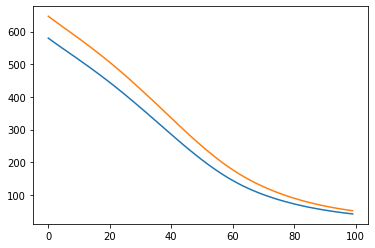

In [20]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

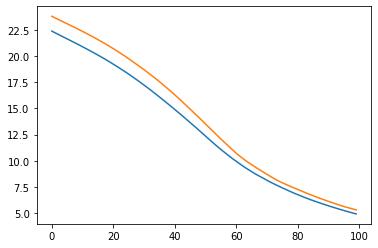

In [21]:
plt.plot(history.epoch, history.history['mae'])
plt.plot(history.epoch, history.history['val_mae'])

In [22]:
model.evaluate(X_test, y_test, batch_size=128)

ValueError: Data cardinality is ambiguous:
  x sizes: 102
  y sizes: 171
Make sure all arrays contain the same number of samples.

In [ ]:
# mozemo da sacuvamo model nakon sto se istrenira da nebi morali ponovo da  pokrecemo trening iz pocetka
# to moze da bude korsino sa bas velikim mrezama jer tu trening moze da taje danima
# vidi u dokumentaciji sta sve ovo cuvanje podrazumeva
model.save('models/nas_boston_model.hdf5')
# alternativno imamo i save_weights() koji cuva samo tezine na ulazima

from tensorflow.keras.models import load_model
# onako sacuvan model mozemo da ucitamo
old_model = load_model('models/nas_boston_model.hdf5')

# i sad sa njim radimo sta god...
#     nova_instanca = ...
#     old_model.predict(nova_instanca)

In [23]:
# evo kako bismo korsitili FCNN za klasifikaciju slika
# za ovo se obicno korsite konvolutivne mreze ali to radimo sledece nedelje
from tensorflow.keras.datasets import mnist

In [24]:
(X_train, y_train), (X_test, y_tet) = mnist.load_data()
print(X_train.shape)   # shape je (60000, 28, 28) tojset ima 60k slika dimenzija 28x28,
                       # posto su slike crno bele dovoljno nam je samo 28x28, da su rbg moralo bi
                       # 28x28x3 tj za svaki kanal
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


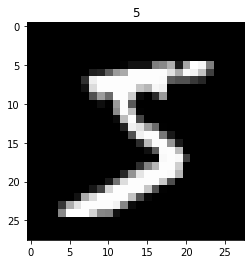

In [25]:
plt.title(y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [26]:
# kao ulaz u nasu mrezu mozemo da ubacimo sliku ali predstavljenu kao jedan vektor-kolona
# moramo ovako zato sto korsitimo FCNN
img_size = X_train.shape[1]
print(img_size)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size)
print(X_train.shape)

# moramo i test skup takodje da reshapujemo!
X_test = X_test.reshape(X_test.shape[0], img_size*img_size)
print(X_test.shape)

28
(60000, 784)
(10000, 784)


In [27]:
#  imamo 10 klasa u ovom skupu. kao poslednji sloj imacemo 10 izlaznih neurona
# prvi neuron kaze da li je instanca klase 1 ili ne, slicno i za ostale

# treba da transformisemo i y u oblik koji ce nam odgovarati ovom obliku, tj da bude nekako
# ovako [0,0,0,0,1,0,0,0,0]  (ovo se zove one-hot encoding (?) )
# za to imamo ugradjenu funkciju to_categorical
from tensorflow.keras.utils import to_categorical

# prosledimo skup koji transformisemo i koliko klasa ima
y_train = to_categorical(y_train, 10)
print(y_train.shape)
print(y_train.shape[0])

y_test = to_categorical(y_test, 10)
print(y_test.shape)
print(y_test.shape[0])

# hocemo i da prevedemo interval [0,255] u [0,1]   (nisam ispratio zasto (?))
X_train = X_train / 255     # note: ako se napise kao X_train /= 255 to pravi gresku
                            # zato sto u mestu pokusavamo da podelimo da dobijemo neki float a 
                            # podaci su integeri (?)  ako napisemo ovako pravilno, zapravo pravimo novu
                            # promenljivu (koja se isto zove) (?)

# moramo i test isto
X_test = X_test / 255

(60000, 10)
60000
(171, 10)
171


In [28]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000, 10)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], units=128, activation='relu'))
model.add(Dense(units=65, activation='relu'))
# poslednji sloj ima onoliko neurona koliko klasa ima
# sigmoidna funkc nam odgovara ako imamo 2 klase, ovako za vise klasa koristicemo softmax
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 65)                8385      
                                                                 
 dense_12 (Dense)            (None, 10)                660       
                                                                 
Total params: 109,525
Trainable params: 109,525
Non-trainable params: 0
_________________________________________________________________


In [36]:
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [37]:
# za optimizer umesto stringa mozemo da prosledimo i objekte
# isto i za loss itd
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [39]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9950 - val_loss: 0.1099 - val_accuracy: 0.9717
Epoch 2/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.1057 - val_accuracy: 0.9740
Epoch 3/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.1091 - val_accuracy: 0.9747
Epoch 4/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0128 - accuracy: 0.9960 - val_loss: 0.1054 - val_accuracy: 0.9758
Epoch 5/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0.1123 - val_accuracy: 0.9747
Epoch 6/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.1053 - val_accuracy: 0.9763
Epoch 7/10
375/375 [==============================] - 0s 1ms/step - loss: 0.0084 - accuracy: 0.9977 - val_loss: 0.1215 - val_accuracy: 0.9735
Epoch 

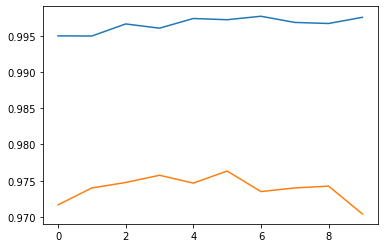

In [45]:
plt.plot(history.epoch, history.history['accuracy'])
plt.plot(history.epoch, history.history['val_accuracy'])

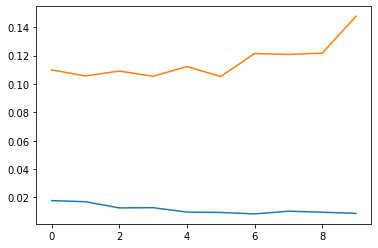

In [46]:
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])

In [47]:
model.evaluate(X_test, y_test)

ValueError: Data cardinality is ambiguous:
  x sizes: 10000
  y sizes: 171
Make sure all arrays contain the same number of samples.

In [48]:
y_predicted = model.predict(X_test)

In [53]:
print(y_predicted.shape)
# ovde trazimo najveci broj i on nam kaze koja klasa je predvidjena za [0] intancu u skupu
print(y_predicted[0])

(10000, 10)
[1.04395286e-11 3.33747127e-11 8.06462452e-09 3.11794935e-07
 8.47045123e-17 2.75795248e-10 1.11384155e-14 9.99999642e-01
 4.15748096e-11 2.11762385e-09]


In [54]:
import numpy as np

In [57]:
pred_class = np.argmax(y_predicted[0])   # ovo vraca poziciju na kojoj je max broj
print(pred_class)

true_class = np.argmax(y_test[0])   # njemu na vezbama se ppoklapa 
print(true_class)

7
1


In [59]:
# interesuje nas za koju instancu je pogreseno
errors = []
for i in range(X_test.shape[0]):
    true_class = np.argmax(y_test[i])
    pred_class = np.argmax(y_predicted[i])
    if true_class != pred_class:
        # cuvamo indekse onih instanci koje su pogresno klasifikovane
        errors.append(i)
        
print(len(errors))

IndexError: index 171 is out of bounds for axis 0 with size 171

In [60]:
import random

In [ ]:
# hocemo npr da nam prikaze neku na kojoj smo pogresili
random_index = random.choice(errors)
true_label = np.argmax(y_Test[random_index])
pred_label = np.argmax(y_predicted[random_index])
print(true_label, pred_label)
# da bismo lepo prikazali sliku moramo da reshapujemo opet posto smo vec reshapovali pre nego sto smo 
# ubacili u mrezu
plt.imshow(X_test[random_index].reshape(img_Size), cmap='gray')